# Works for core 2004-Present

In [2]:
import sys, os
import numpy as np      
from netCDF4 import Dataset      
import matplotlib.pyplot as plt                         

import cartopy.crs as ccrs                              
import cartopy.feature as cfeature         
import cartopy.io.shapereader as shpreader 

import warnings
warnings.filterwarnings("ignore")

# Function to load core 

In [7]:
def load_core(time_dict):
    
    t = time_dict

    if int(t["year"]) <= 2024:

        base = f"/gws/nopw/j04/cocoon/SSA_domain/ch9_wavelet/{t['year']}/{t['month']}"
        fname = f"{t['year']}{t['month']}{t['day']}{t['hour']}{t['minute']}.nc"

        ds = Dataset(os.path.join(base, fname))
        cores = ds["cores"][0, :, :]
        ds.close()

        geodata = np.load("/gws/nopw/j04/cocoon/SSA_domain/lat_lon_2268_2080.npz")
        lons = geodata["lon"][:, :]
        lats = geodata["lat"][:, :]        

        return cores, lats, lons

    else:

        base = f"/gws/ssde/j25b/swift/rt_cores/{t['year']}/{t['month']}/{t['day']}/{t['hour']}{t['minute']}"
        fname = f"Convective_struct_extended_{t['year']}{t['month']}{t['day']}{t['hour']}{t['minute']}_000.nc"

        ds = Dataset(os.path.join(base, fname))
        cores = ds["cores"][:, :]
        ds.close()

        geodata = Dataset("/gws/ssde/j25b/swift/rt_cores/geoloc_grids/nxny2268_2080_nxnyds164580_blobdx0.04491576_arean41_n27_27_79.nc")
        lons = geodata["lons_mid"][:]
        lats = geodata["lats_mid"][:]

        return cores, lats, lons


# Choose time

In [ ]:
year = "2021"
month = "02"
day = "14"
hour = "12"
minute = "00"

In [10]:
time_dict = {
    "year": year,
    "month": month,
    "day": day,
    "hour": hour,
    "minute": minute   
}

cores, lats, lons = load_core(time_dict=time_dict)

In [12]:
# replace missing values
filtered_lons = np.where(lons == -999.999, np.nan, lons)
filtered_lats = np.where(lats == -999.999, np.nan, lats)

binary_cores = (cores != 0).astype(int)

# Plotting full domain

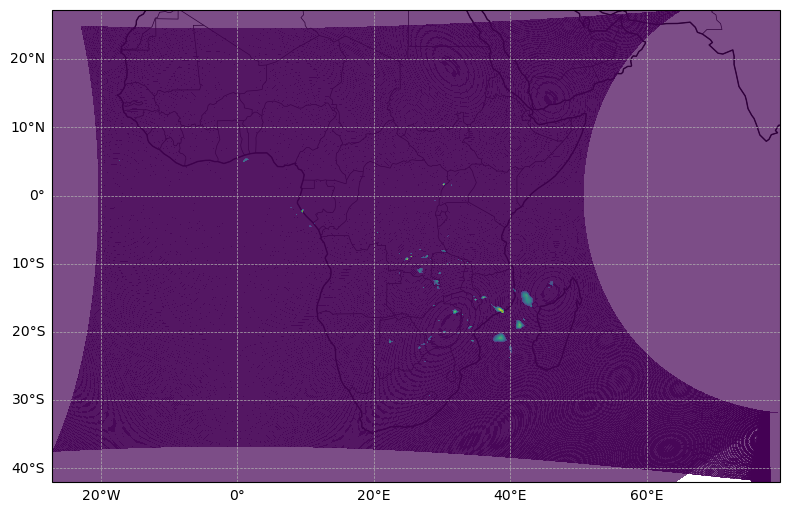

In [ ]:
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = (
    np.nanmin(filtered_lons),
    np.nanmax(filtered_lons),
    np.nanmin(filtered_lats),
    np.nanmax(filtered_lats),    
)

ax.set_extent(extent, crs=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='none', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5, zorder=1)

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

gl = ax.gridlines(draw_labels=True, alpha=1, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False

contour_core = ax.pcolormesh(
    lons, lats, cores,
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    zorder=2
)
plt.tight_layout()
plt.show()